In [17]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.restoration import denoise_tv_chambolle

In [18]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

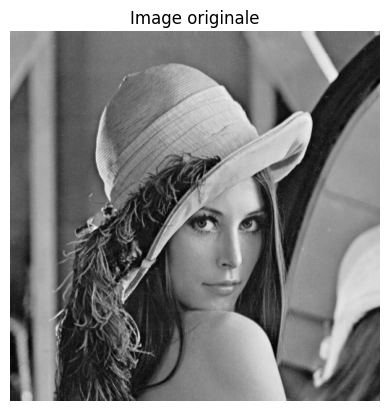

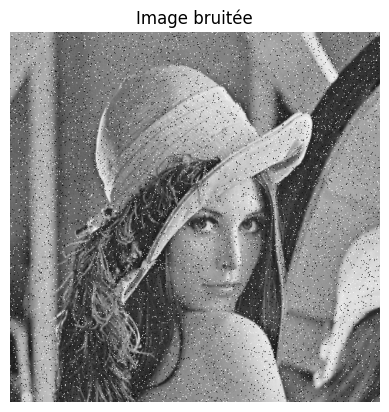

PSNR entre l'image originale et l'image bruitée :  18.390644876545796


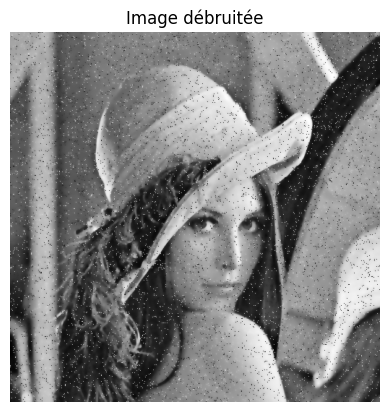

PSNR entre l'image originale et l'image débruitée :  23.80663953275608


In [38]:
image = import_image("lena.pgm")
display_image(image, "Image originale")

# Bruit
image_noised = ski.util.random_noise(image, mode='s&p', amount=0.05) * 255
image_noised = image_noised.astype(np.uint8)
display_image(image_noised, "Image bruitée")
ski.io.imsave("results/noised.pgm", image_noised)

psnr_originale_bruitee = psnr(image, image_noised)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

# Appliquer la méthode de variation totale
weight = 0.1  # Paramètre de régularisation, compromis entre débruitage et préservation des contours
image_denoised = denoise_tv_chambolle(image_noised, weight=weight, channel_axis=None)
image_denoised = (image_denoised * 255).astype(np.uint8)

display_image(image_denoised, "Image débruitée")
ski.io.imsave("results/denoised.pgm", image_denoised)
psnr_originale_debruitee = psnr(image, image_denoised)
print("PSNR entre l'image originale et l'image débruitée : ", psnr_originale_debruitee)